# Import Data:

In [26]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

In [27]:
# creating NaN values using na_values = '-'
# Values with a NaN value are ignored from operations like sum, count, etc.

compdata = pd.read_csv('comp1data.csv', header=0, na_values = '-')
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


# Missing Data:

In [28]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [29]:
compdata.isna().any()

I1         False
I2         False
I3          True
P(IPO)      True
P(H)        True
P(L)        True
P(1Day)     True
C1          True
C2          True
C3          True
C4          True
C5          True
C6          True
C7          True
T1          True
T2          True
T3          True
T4          True
T5          True
S1          True
S2          True
S3          True
dtype: bool

In [30]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64

In [31]:
# what is the percentage of missing data in each column
compdata.isna().mean().round(4) * 100

# Majority of the data is missing from C7

I1          0.00
I2          0.00
I3          1.17
P(IPO)      0.73
P(H)        1.47
P(L)        1.47
P(1Day)     3.23
C1          3.23
C2          3.23
C3          5.28
C4          3.23
C5          0.88
C6          0.88
C7         10.56
T1          0.15
T2          0.15
T3          0.15
T4          0.15
T5          0.15
S1          0.15
S2          0.15
S3          0.15
dtype: float64

- Should we just use the median to fill the continuous values?


__Replace missing values in continuous field with linear regression predictions__

Seaborn has some handy plots to visualize the (linear) relationship between variables. 
We could use a pairplot to visualize the relationship between the variables. 
But because the heatmap already showed the limited number of correlated variables, 
we'll look at each of the highly correlated variables separately.

As the regression line shows, there is a linear relationship between these variables. Thanks to the hue parameter we can see that the regression lines for target=0 and target=1 are the same.

sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

__Replace missing values in categorical field with logistic regression predictions__

__Checking the correlations between interval variables
A heatmap is a good way to visualize the correlation between variables__

def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

# Descriptive Statistics

In [32]:
compdata.shape

(682, 22)

In [33]:
compdata.describe(include='all')

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682,682,674,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,...,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
unique,682,682,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,XRM,Fleetmatics Group Ltd,2834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,...,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,NaN,NaN,NaN,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,...,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,NaN,NaN,NaN,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,...,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,NaN,NaN,NaN,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,...,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,NaN,NaN,NaN,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,...,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,NaN,NaN,NaN,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,...,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000


In [34]:
compdata.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

# Meta Data:

__Not Finished__

data = []
for v in compdata.columns:
    # Defining the role
    if v == 'I1':
        role = 'ticker'
    elif v == 'I2':
        role = 'company_name'
    elif v == 'I3':
        role = 'standard_industry_classifier'
    else:
        role = 'input'
         
    # Defining the level
    if v == ('C2','Y1','Y2','C3'':
        level = 'binary'
    elif v == 'I2':
        role = 'company_name'
    elif v == 'I3':
        role = 'standard_industry_classifier'
    else:
        role = 'input'
    
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if v == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[v].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': v,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

# Data Visualization

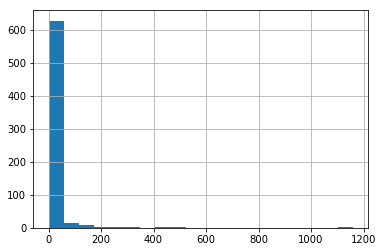

In [68]:
compdata['P(1Day)'].hist(bins=20)

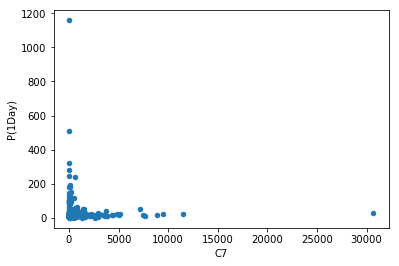

In [69]:
compdata.plot.scatter(x='C7', y='P(1Day)')

# Variable Imputation:

In [12]:
# Target Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

In [13]:
# Control Variable Calculation

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5,S1,S2,S3,P(mid),Y1,Y2,C3_,C5_,C6_
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,690.0,62.0,117.0,139.0,9.0,0,1,1,3.864345,11.111111
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,1120.0,71.0,242.0,237.0,9.0,1,0,0,12.028832,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,325.0,61.0,33.0,60.0,13.0,1,0,0,3.369134,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,509.0,80.0,59.0,110.0,15.0,1,1,0,3.299697,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,720.0,67.0,149.0,167.0,20.0,0,1,1,3.726269,5.000000


In [15]:
# Ratios:

    # ** How to fins the ratio for T1 and T2
    # ** Should the ratios be multiplied by 100?

# Percentage of real words
compdata['T3_'] = compdata['T3']/compdata['T2'] 
# Percentage of long sentences
compdata['T4_'] = compdata['T4']/compdata['T1'] 
# Percentage of long words
compdata['T5_'] = compdata['T5']/compdata['T2'] 
# Percentage of positive words
compdata['S1_'] = compdata['S1']/compdata['T2'] 
# Percentage of negative words
compdata['S2_'] = compdata['S2']/compdata['T2'] 
# Percentage of uncertain words
compdata['S3_'] = compdata['S3']/compdata['T2']

compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,Y2,C3_,C5_,C6_,T3_,T4_,T5_,S1_,S2_,S3_
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,1,1,3.864345,11.111111,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0,0,12.028832,0.000000,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0,0,3.369134,0.000000,0.909350,0.636816,0.061764,0.011593,0.006271,0.011403
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,1,0,3.299697,0.000000,0.917060,0.539634,0.061630,0.009686,0.007144,0.013319
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,1,1,3.726269,5.000000,0.888469,0.587413,0.048550,0.004518,0.010047,0.011261
